In [1]:
from tinydb import TinyDB, Query
from datetime import datetime
from database import IoTNodeData
import matplotlib.pyplot as plt

def get_nodes_from_exp(exp_path):
    db = TinyDB(exp_path)
    nodes_table = db.table("iot_nodes")
    return [IoTNodeData.from_dict(d) for d in nodes_table.all()]

In [2]:
network_1 = get_nodes_from_exp("data/experiment-w2=0-gamma=0.json")
network_2 = get_nodes_from_exp("data/experiment-w2=50-gamma=1.json")

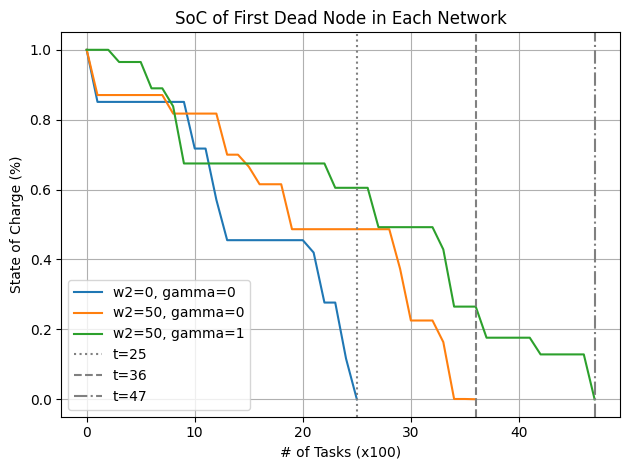

In [3]:
def plot_lifetime():
    exp_paths = {
        "w2=0, gamma=0": "data/experiment-w2=0-gamma=0.json",
        "w2=50, gamma=0": "data/experiment-w2=50-gamma=0.json",
        "w2=50, gamma=1": "data/experiment-w2=50-gamma=1.json"
    }

    soc_records = {}
    death_indices = {}

    # Process each experiment
    for label, path in exp_paths.items():
        nodes = get_nodes_from_exp(path)
        for node in nodes:
            if node.SoC_record[-1] == 0:
                soc_records[label] = node.SoC_record
                death_indices[label] = node.SoC_record.index(0)
                break

    # Plot
    for label, soc in soc_records.items():
        plt.plot(soc, label=label)

    # Add individual death lines
    death_style = {
        "w2=0, gamma=0": ":",
        "w2=50, gamma=0": "--",
        "w2=50, gamma=1": "-."
    }
    for label, death_idx in death_indices.items():
        plt.axvline(x=death_idx, color='gray', linestyle=death_style[label],
                    label=f"t={death_idx}")

    plt.xlabel("# of Tasks (x100)")
    plt.ylabel("State of Charge (%)")
    plt.title("SoC of First Dead Node in Each Network")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_lifetime()

In [4]:
import json

def get_response_time(path):
    with open(path, 'r') as f:
        res = json.load(f)["response_time_record"]
    return res

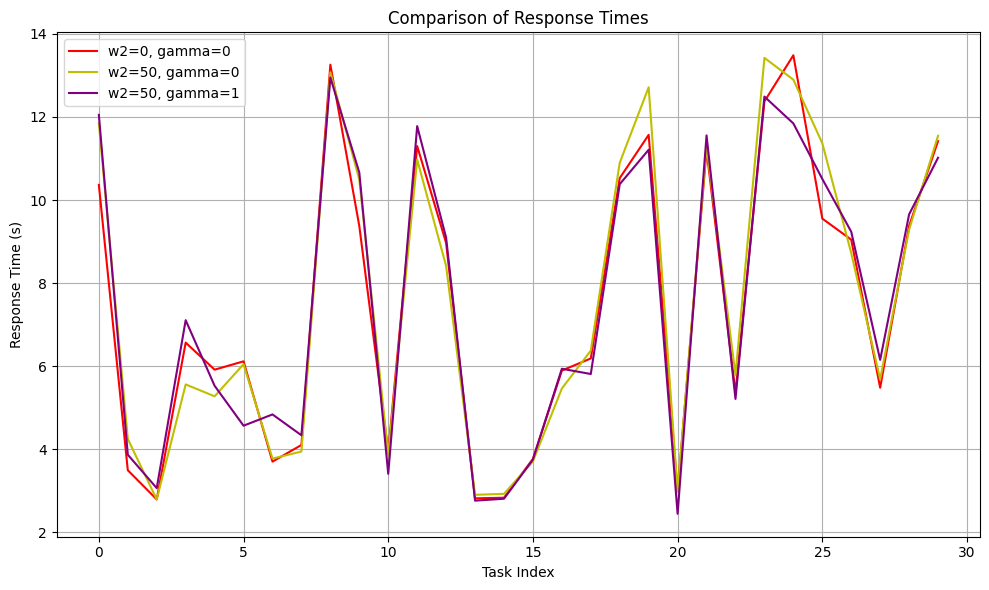

In [ ]:
def plot_response_time():

    r1 = get_response_time("data/turnaround_time/ctt-w2=0-gamma=0.json")
    r2 = get_response_time("data/turnaround_time/ctt-w2=50-gamma=0.json")
    r3 = get_response_time("data/turnaround_time/ctt-w2=50-gamma=1.json")

    x1 = range(len(r1))
    x2 = range(len(r2))
    x3 = range(len(r3))

    plt.figure(figsize=(10, 6))
    plt.plot(x1, r1, label="w2=0, gamma=0", color='red')
    plt.plot(x2, r2, label="w2=50, gamma=0", color='y')
    plt.plot(x3, r3, label="w2=50, gamma=1", color='purple')

    plt.xlabel("Task Index")
    plt.ylabel("Response Time (s)")
    plt.title("Comparison of Response Times")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_response_time()

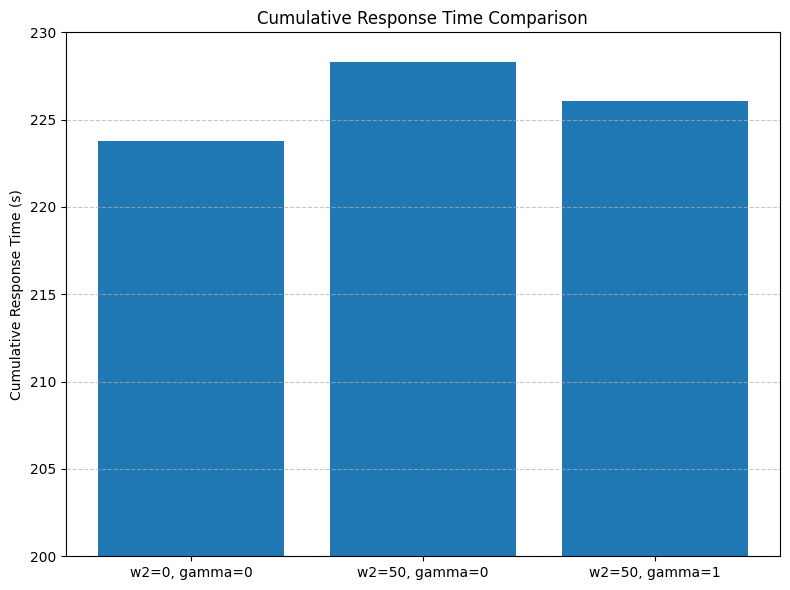

In [ ]:
def plot_cumulative_response_time():
    
    r1 = get_response_time("data/turnaround_time/ctt-w2=0-gamma=0.json")
    r2 = get_response_time("data/turnaround_time/ctt-w2=50-gamma=0.json")
    r3 = get_response_time("data/turnaround_time/ctt-w2=50-gamma=1.json")

    cumulative_times = [
        sum(r1),
        sum(r2),
        sum(r3)
    ]

    labels = [
        "w2=0, gamma=0",
        "w2=50, gamma=0",
        "w2=50, gamma=1"
    ]

    plt.figure(figsize=(8, 6))
    plt.bar(labels, cumulative_times)
    plt.ylim(200, 230)

    plt.ylabel("Cumulative Response Time (s)")
    plt.title("Cumulative Response Time Comparison")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_cumulative_response_time()

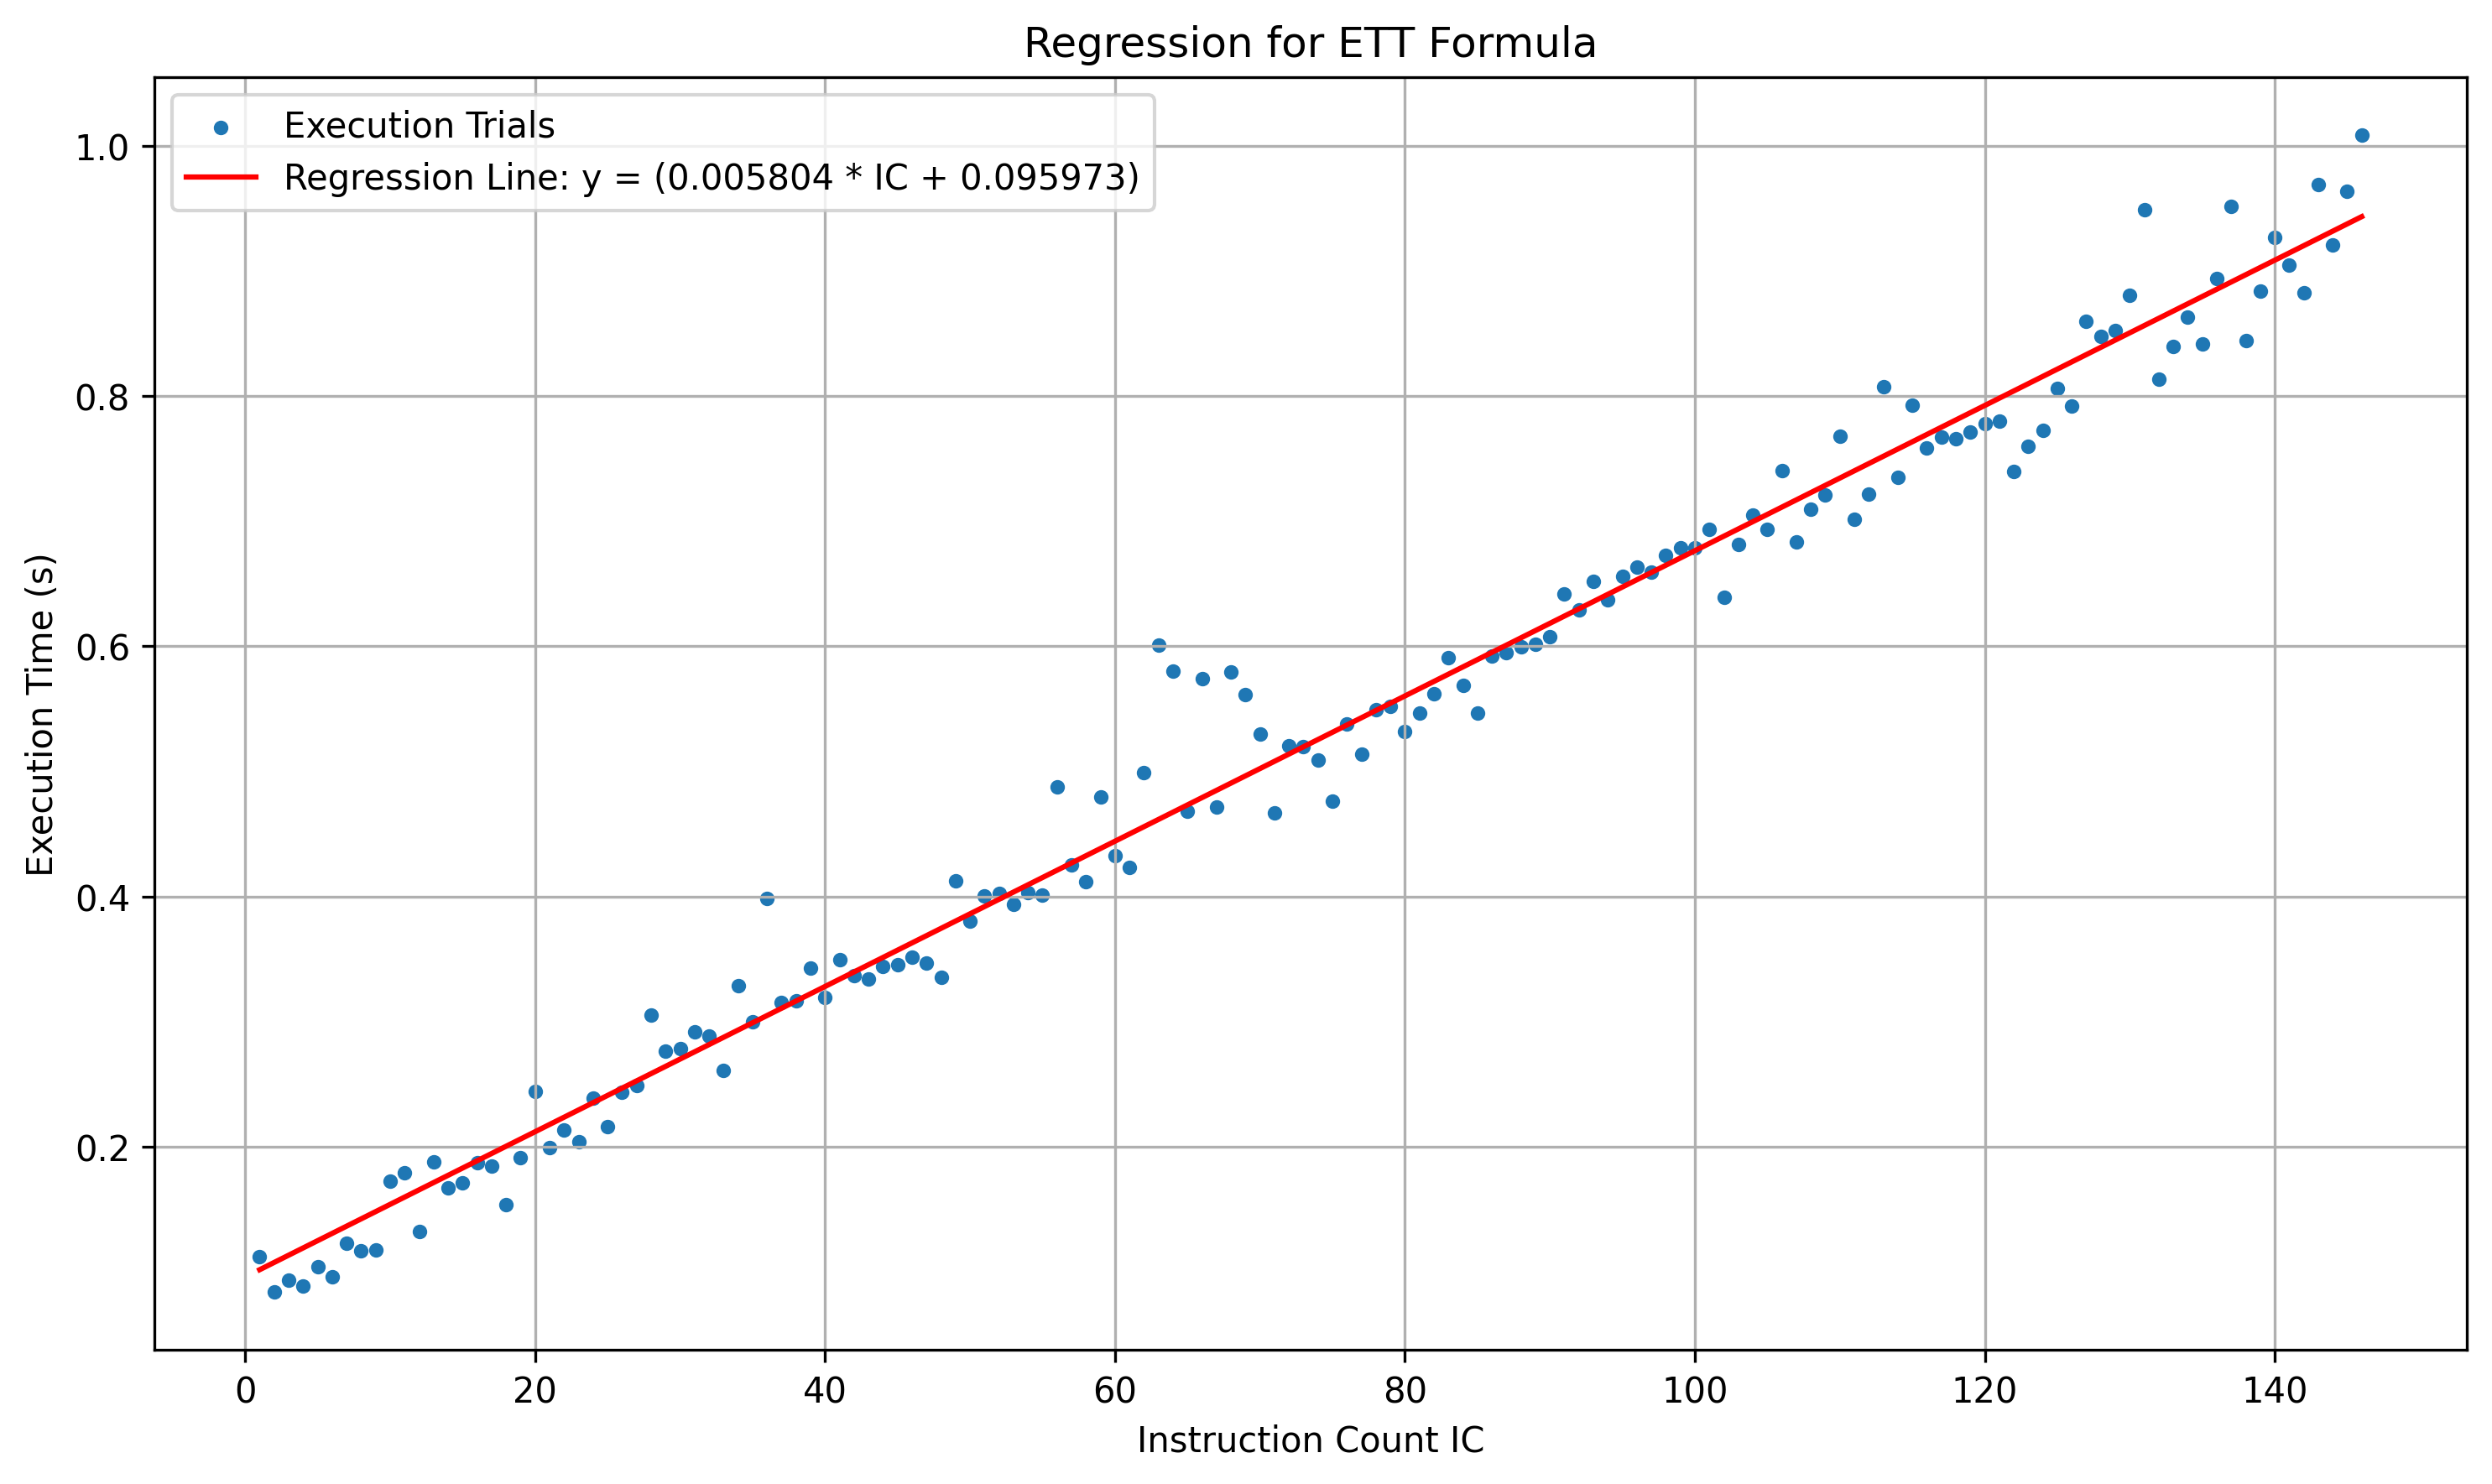

'y = 0.005804 * x + 0.095973'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# collected from benchmarking
data = [
    0.11240410804748535, 0.08391308784484863, 0.0937337875366211, 0.08900785446166992,
    0.10434103012084961, 0.09592103958129883, 0.12284493446350098, 0.11689281463623047,
    0.11753392219543457, 0.1725311279296875, 0.17943501472473145, 0.13260793685913086,
    0.18788886070251465, 0.16728496551513672, 0.17089295387268066, 0.18723177909851074,
    0.18446707725524902, 0.15406203269958496, 0.1915140151977539, 0.24412012100219727,
    0.19910812377929688, 0.21323895454406738, 0.20427703857421875, 0.2389070987701416,
    0.2163996696472168, 0.24360418319702148, 0.24911785125732422, 0.3055458068847656,
    0.27669787406921387, 0.2783820629119873, 0.29159116744995117, 0.28824305534362793,
    0.261138916015625, 0.3285839557647705, 0.29975295066833496, 0.3982830047607422,
    0.3150961399078369, 0.3167579174041748, 0.34274768829345703, 0.31964707374572754,
    0.34975719451904297, 0.3366270065307617, 0.3344419002532959, 0.34400296211242676,
    0.3455488681793213, 0.3513169288635254, 0.3469247817993164, 0.33557772636413574,
    0.4124140739440918, 0.3805959224700928, 0.40073394775390625, 0.40233707427978516,
    0.3936009407043457, 0.40302610397338867, 0.40140485763549805, 0.48783206939697266,
    0.4250960350036621, 0.41172194480895996, 0.4796440601348877, 0.4327511787414551,
    0.4233739376068115, 0.49907612800598145, 0.600902795791626, 0.5802900791168213,
    0.46812987327575684, 0.5742859840393066, 0.47129201889038086, 0.5796120166778564,
    0.5612926483154297, 0.5300278663635254, 0.46669816970825195, 0.5205099582672119,
    0.5197720527648926, 0.5093860626220703, 0.47653889656066895, 0.537675142288208,
    0.5140271186828613, 0.5493409633636475, 0.5517890453338623, 0.5321319103240967,
    0.5466160774230957, 0.5621659755706787, 0.590684175491333, 0.5689661502838135,
    0.5469269752502441, 0.5923070907592773, 0.5949859619140625, 0.5995502471923828,
    0.6016550064086914, 0.6074111461639404, 0.6421689987182617, 0.6288378238677979,
    0.6516408920288086, 0.6373827457427979, 0.6556601524353027, 0.663532018661499,
    0.6595520973205566, 0.6725132465362549, 0.678380012512207, 0.67889404296875,
    0.6931569576263428, 0.6390728950500488, 0.6811709403991699, 0.7046430110931396,
    0.6934070587158203, 0.7404260635375977, 0.6833639144897461, 0.7096540927886963,
    0.7207958698272705, 0.7680759429931641, 0.7016401290893555, 0.7212879657745361,
    0.8075757026672363, 0.7348339557647705, 0.7925262451171875, 0.758155107498169,
    0.7673661708831787, 0.7658193111419678, 0.7710702419281006, 0.7779972553253174,
    0.7801501750946045, 0.7398691177368164, 0.7600669860839844, 0.7724590301513672,
    0.8059680461883545, 0.7923130989074707, 0.8600490093231201, 0.8473851680755615,
    0.8525731563568115, 0.8807108402252197, 0.9487490653991699, 0.8134748935699463,
    0.8395960330963135, 0.8633217811584473, 0.8415906429290771, 0.8938379287719727,
    0.951509952545166, 0.8441898822784424, 0.8837859630584717, 0.9265758991241455,
    0.9047868251800537, 0.8822338581085205, 0.9686918258666992, 0.9204590320587158,
    0.9637932777404785, 1.0085811614990234
]

x = np.arange(1, len(data) + 1)
y = np.array(data)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept

plt.figure(figsize=(10, 6), dpi=300)
plt.scatter(x, y, s=10, label='Execution Trials')
plt.plot(x, regression_line, color='red', label='Regression Line: '+f"y = ({slope:.6f} * IC + {intercept:.6f})")
plt.title("Regression for ETT Formula")
plt.xlabel("Instruction Count IC")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Provide linear regression formula
linear_formula = f"y = {slope:.6f} * x + {intercept:.6f}"
linear_formula
